In [1]:
#Please,download 2csv files from this url: https://drive.google.com/drive/folders/1dRkJiH4i3NFS_9fG8rXBsfx6Y99VDhGo?usp=sharing
#!pip install re
#!pip install os
#!pip install io
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib
#!pip install sklearn
#!pip install sweetviz
#!pip install tqdm

In [2]:
import re
import os
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
#import sweetviz as sv
from tqdm import tqdm,trange

In [3]:
file = 'Desktop/Question/loan/loan.csv'

In [4]:
df = pd.read_csv(file)
df['loan_status2'] = ''

C:\Users\TOT_User\AppData\Local\Temp\ipykernel_11924\2114627168.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [5]:
#report = sv.analyze(df)
#report.show_html('report.html',open_browser=True)

In [6]:
for i in trange(len(df)):

    try:
        if df['loan_status'][i] == 'Default':
            df['loan_status2'][i] = 1
        else:
            df['loan_status2'][i] = 0
    except:
        pass



  0%|                                               | 0/887379 [00:00<?, ?it/s]C:\Users\TOT_User\AppData\Local\Temp\ipykernel_11924\433327464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status2'][i] = 0
  0%|                                   | 164/887379 [00:00<09:01, 1639.91it/s]C:\Users\TOT_User\AppData\Local\Temp\ipykernel_11924\433327464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status2'][i] = 1
100%|████████████████████████████████| 887379/887379 [05:44<00:00, 2575.83it/s]


In [7]:
columns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status'
        ,'issue_d', 'loan_status','loan_status2', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'
       ]
df = df[columns]

In [8]:
file2 = 'Desktop/Question/loan/loan2.csv'
df.to_csv(file2,index=False)

In [9]:
new_df = pd.read_csv(file2)
#new_df.drop('Unnamed: 0',axis=1,inplace=True)
new_df.columns

C:\Users\TOT_User\AppData\Local\Temp\ipykernel_11924\1308569138.py:1: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(file2)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'loan_status2', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_sta

In [10]:
new_df2 = new_df[['id', 'member_id','loan_amnt','term','grade','sub_grade','emp_length','home_ownership','int_rate','verification_status','loan_status2']].dropna()

In [11]:
# Separate the numeric columns
cred_num = new_df2.select_dtypes(exclude=['object'])
# Separate non-numeric columns
cred_cat = new_df2.select_dtypes(include=['object'])
# One-hot encode the non-numeric columns only
cred_cat_onehot = pd.get_dummies(cred_cat)
# Union the numeric columns with the one-hot encoded columns
cr_loan = pd.concat([cred_num, cred_cat_onehot], axis=1)
print(cr_loan.columns)
print(cr_loan.head())

Index(['id', 'member_id', 'loan_amnt', 'int_rate', 'loan_status2',
       'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_

In [12]:
x = cr_loan.drop('loan_status2',axis=1)
y = cr_loan[['loan_status2']]

## Modeling

In [13]:
#pip install statsmodels
import statsmodels.api as sm

In [14]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.009937
         Iterations: 35


C:\Users\TOT_User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                           Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.040      
Dependent Variable:              loan_status2                AIC:                         16859.2022 
Date:                            2022-07-28 17:37            BIC:                         17522.9212 
No. Observations:                842554                      Log-Likelihood:              -8372.6    
Df Model:                        56                          LL-Null:                     -8722.2    
Df Residuals:                    842497                      LLR p-value:                 7.0061e-112
Converged:                       0.0000                      Scale:                       1.0000     
No. Iterations:                  35.0000                                                             
-----------------------------------------------------------------------------------------------------
                        

In [15]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
id,3.271642e-10
member_id,7.328081e-10
loan_amnt,8.790457e-01
int_rate,9.640040e-01
term_ 36 months,9.999969e-01
...,...
home_ownership_OWN,NaN
home_ownership_RENT,NaN
verification_status_Not Verified,NaN
verification_status_Source Verified,NaN


## Creating the training and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\TOT_User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Evaluation

In [17]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[336566     10]
 [   446      0]]


In [19]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  336566 correct predictions
 The result is telling us that we have:  456 incorrect predictions
 We have a total predictions of:  337022


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    336576
           1       0.00      0.00      0.00       446

    accuracy                           1.00    337022
   macro avg       0.50      0.50      0.50    337022
weighted avg       1.00      1.00      1.00    337022



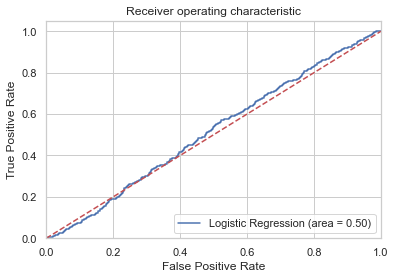

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Deployment 

In [22]:
cr_loan['PD'] = logreg.predict_proba(cr_loan[X_train.columns])[:,1]
#cr_loan[['id','member_id','PD']].head(10)

In [23]:
cr_loan.head()

,id,member_id,loan_amnt,int_rate,loan_status2,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,PD
0,1077501,1296599,5000.0,10.65,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0.053349
1,1077430,1314167,2500.0,15.27,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0.182578
2,1077175,1313524,2400.0,15.96,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0.190977
3,1076863,1277178,10000.0,13.49,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0.003564
4,1075358,1311748,3000.0,12.69,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0.144941


In [25]:
cr_loan_PD = cr_loan[['id','member_id','PD']]
cr_loan_PD.describe()

,id,member_id,PD
count,8.425540e+05,8.425540e+05,8.425540e+05
mean,3.229192e+07,3.481713e+07,5.814854e-03
std,2.283990e+07,2.412888e+07,2.572176e-02
min,5.473400e+04,7.047300e+04,1.411720e-11
25%,9.045221e+06,1.077843e+07,7.053834e-07
50%,3.431206e+07,3.696627e+07,3.600684e-05
75%,5.452373e+07,5.809579e+07,8.381201e-04
max,6.861706e+07,7.354484e+07,9.971857e-01


In [26]:
cr_loan_PD.head(10)

,id,member_id,PD
0,1077501,1296599,0.053349
1,1077430,1314167,0.182578
2,1077175,1313524,0.190977
3,1076863,1277178,0.003564
4,1075358,1311748,0.144941
5,1075269,1311441,0.053197
6,1069639,1304742,0.018292
7,1072053,1288686,0.145425
8,1071795,1306957,0.038792
9,1071570,1306721,0.043701


## Setting the threshold

In [ ]:
'''cr_loan_PD['loan_status'] = cr_loan_PD['PD'].apply(lambda x: 1 if x > 0.5 else 0)
cr_loan_PD.head(10)'''